# Ship and Vessel Detection for Maritime Safety and Security

## Business Question 
**Objective**: To develop a deep learning-based system to classify ships into distinct categories using images captured by survey boats, aiding maritime authorities in enhancing ship detection processes, reducing human error, and improving operational efficiency.

**Ship Categories**: Cargo, Military, Carrier, Cruise, Tankers.Ship and Vessel Detection.

**Data Source**: Gathered from Kaggle at Ship and Vessel Detectionhttps://www.kaggle.com/datasets/arpitjain007/game-of-deep-learning-ship-datasets.



## Steps Involved

### . Data Preprocessing
i had started cleaning and preparing the image data for input into the model and there some step for that:
- Resizing the images
- Normalizing their pixel values
- Organizing the IMAGES in to appropriate train_DATA and testing_DATA Sets

### 2. Model Development
i have design and train a deep__learning MODEL,and with the help of CCN or a PRETRAIned Model.

### 3. Model Evaluation
Evaluation the performance using the test data and refine it to achieve the highest possible accuracy.

### 4. Deployment
Helping the Maritime and Coastguard Agency identify ship types efficiently and accurately from new survey images.

**Importing the required librarry**

In [1]:
import os
import numpy as npa
import pandas as pad
import matplotlib.pyplot as ply
import seaborn as sun
import tensorflow as toofan
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras import datasets, layers, models
from tensorflow.math import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import load_img, img_to_array
import cv2
import warnings
warnings.filterwarnings('ignore')

**Data Explore**

For Reading the Data we use this command

In [3]:
train = pad.read_csv(r"C:/Users/Sahil Rathi/Desktop/ship project/archive (1)/train/train.csv")

**for getting the deault 5 value we need to use below command**

In [87]:
train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2
...,...,...
6246,2603499.jpg,4
6247,2881056.jpg,3
6248,1145083.jpg,2
6249,2898652.jpg,5


**Categoring the image**

<Axes: xlabel='category', ylabel='count'>

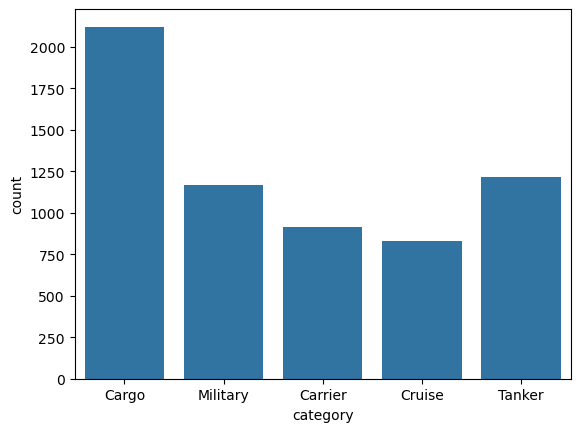

In [7]:
ship_categories = {1: 'Cargo', 2: 'Military', 3: 'Carrier', 4: 'Cruise', 5: 'Tanker'}
sun.countplot(x=train["category"].map(ship_categories))

### **Data Preprocessing**
The first task was to clean and prepare the image dataset for training. This step is Important to ensure the data is in  into the model is in the actual format and quality, which helps in achieving high model accuracy. Below are the steps we are using for Preprcess the data.

## Image Preprocessing: 
**Resizing the Images**:
 - Empty lists were initialized to hold the resized images and their respective paths.

**Loading and Preprocessing Images**:
   - The full file path for every image in the training Set was generated.
   - The images was loaded and resized to the specified dimensions.
   -  why pixel value every time dividing by 255.0, bringing the values into the range 0 to 1.
   -  pixel value range for 8-bit images only.

In [9]:
PARTH = "C:/Users/Sahil Rathi/Desktop/ship project/archive (1)/train/images"
refactor_size = 128
resized_image_list = []
all_paths = []

for i in range(len(train)):
    image_path = os.path.join(PARTH, train["image"][i])

    iMg = load_img(image_path, target_size=(refactor_size, refactor_size))
    iMg_array = img_to_array(iMg)
    
    iMg_array = iMg_array / 255.0 
    resized_image_list.append(iMg_array)
    all_paths.append(image_path)
resized_image_list = npa.asarray(resized_image_list)

**Data Augmentation for improve accuracy and reduce overfitting**

Here I Applied transformations like random flips and rotations to artificially expand the dataset. This helps in making the model more robust to different image variations.

In [72]:
data_augmentation = toofan.keras.Sequential([
    toofan.keras.layers.RandomFlip('horizontal'),
    toofan.keras.layers.RandomRotation(0.2),])
augmented_images = data_augmentation(resized_image_list)

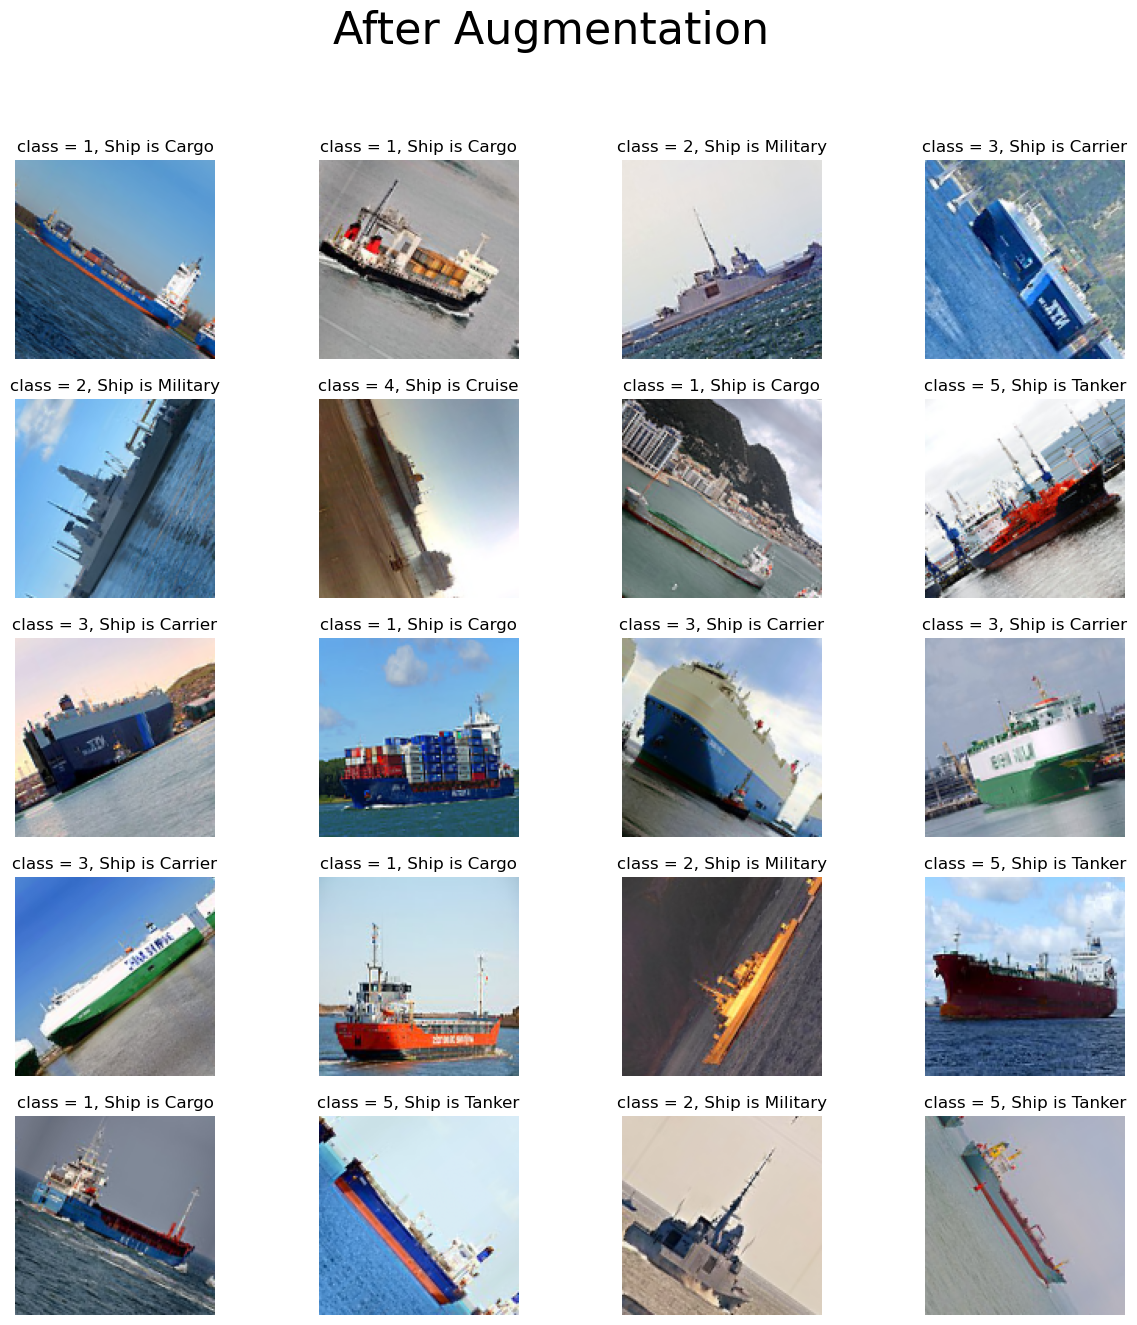

In [13]:
nrow = 5
ncol = 4
fig2 = ply.figure(figsize=(15, 15))
fig2.suptitle('After Augmentation', size=32)
for i in range(20):
    ply.subplot(nrow, ncol, i + 1)
    ply.imshow(augmented_images[i])
    ply.title('class = {x}, Ship is {y}'.format(x=train["category"][i], y=ship_categories[train["category"][i]]))
    ply.axis('Off')
    ply.grid(False)
ply.show()

**Convert classes to zero-based indexing**

In [15]:
class_values = train["category"] - 1
class_values.value_counts()

category
0    2120
4    1217
1    1167
2     916
3     832
Name: count, dtype: int64

**Update ship_categories**

In [17]:
ship_categories = {0: 'Cargo', 1: 'Military', 2: 'Carrier', 3: 'Cruise', 4: 'Tanker'}

# Train_Test_Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(resized_image_list, class_values,random_state=30)
print(X_train.shape, y_train.shape)

(4689, 128, 128, 3) (4689,)


###  **Model Development**
For this task, we chose a **Convolutional_Neural_Network**, which is ideal for Image_classification tasks. We also experimented with **data augmentation** to improve model robustness and reduce overfitting.

- **Data Augmentation**: Applied transformations like random flips and rotations to artificially expand the_dataset. This helpin making the model more robust to different_image variations. Augmentation helps improve the_model’s ability to generalize to unseen_data by creating_new_training examples from the existing data.
- **CNN Architecture**: Designed a CNN_with 3 layers having max-pooling layers. A dense layer with softmax activation function was used in multiclassclassification.the image classification is best done C_N_N MODEl tasks because of its ability to learn spatial_hierarchies in images.

**Removing the warning from tensorflow i used this below code**

In [89]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
toofan.get_logger().setLevel('ERROR') 

**Defining a callback to save the best model based on validation accuracy**

In [82]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**for training_the_model with the ModelCheckpoint callback and keep_history**

In [84]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, callbacks=[checkpoint])

Epoch 1/20
147/147 [==============================] - ETA: 0s - loss: 1.4265 - accuracy: 0.3886
Epoch 1: val_accuracy improved from -inf to 0.49520, saving model to best_model.h5
147/147 [==============================] - 65s 420ms/step - loss: 1.4265 - accuracy: 0.3886 - val_loss: 1.2709 - val_accuracy: 0.4952
Epoch 2/20
147/147 [==============================] - ETA: 0s - loss: 1.1673 - accuracy: 0.5157
Epoch 2: val_accuracy improved from 0.49520 to 0.56814, saving model to best_model.h5
147/147 [==============================] - 74s 503ms/step - loss: 1.1673 - accuracy: 0.5157 - val_loss: 1.0332 - val_accuracy: 0.5681
Epoch 3/20
147/147 [==============================] - ETA: 0s - loss: 1.0679 - accuracy: 0.5507
Epoch 3: val_accuracy did not improve from 0.56814
147/147 [==============================] - 79s 537ms/step - loss: 1.0679 - accuracy: 0.5507 - val_loss: 1.0609 - val_accuracy: 0.5093
Epoch 4/20
147/147 [==============================] - ETA: 0s - loss: 0.9749 - accuracy: 0

#### Result
The model performed well during the early epochs, with significant improvements in both training and validation. However, validation accuracy plateaued after Epoch 2, suggesting potential overfitting. The final model achieved **.7453** validation accuracy, while the training accuracy reached **.8152%**. This indicates good performance on the training set but further tuning or adjustments might be necessary for better generalization.

**Loading_the_best_model_saved_during_training**

In [70]:
best_model = models.load_model('best_model.h5')

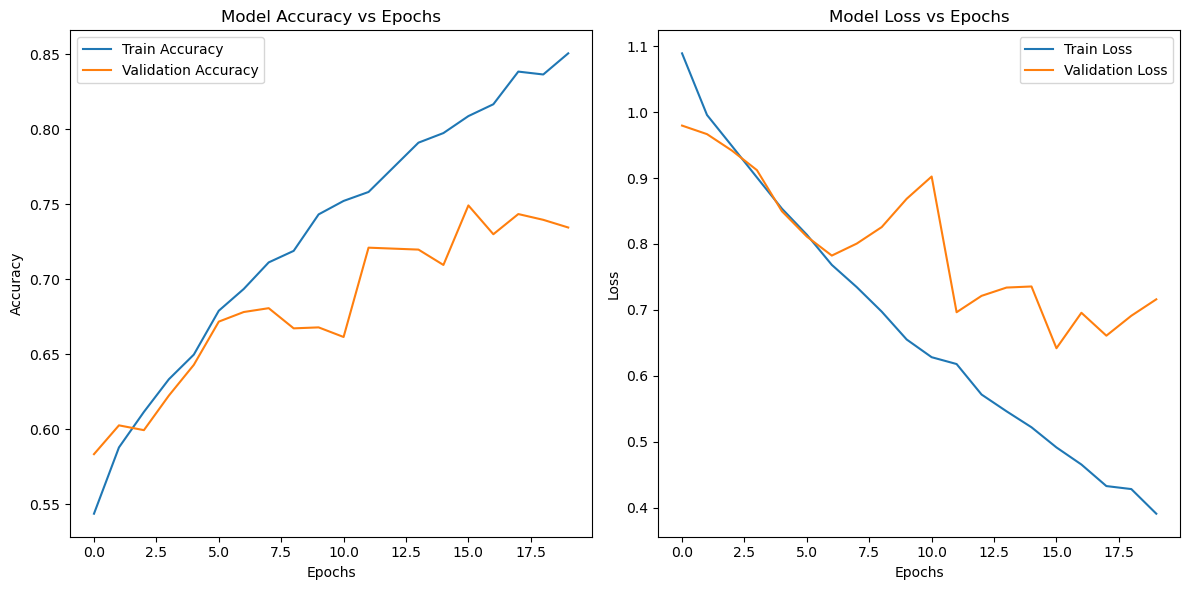

In [41]:
his=history.history
ply.figure(figsize=(12, 6))

ply.subplot(1, 2, 1)
ply.plot(his['accuracy'], label='Train Accuracy')
ply.plot(his['val_accuracy'], label='Validation Accuracy')
ply.title('Model Accuracy vs Epochs')
ply.xlabel('Epochs')
ply.ylabel('Accuracy')
ply.legend()

ply.subplot(1, 2, 2)
ply.plot(his['loss'], label='Train Loss')
ply.plot(his['val_loss'], label='Validation Loss')
ply.title('Model Loss vs Epochs')
ply.xlabel('Epochs')
ply.ylabel('Loss')
ply.legend()

ply.tight_layout()
ply.show()

**Evaluating the best model on_the_testing_set**

After training the model, it is evaluated using a testing dataset that it has never seen before. This step is critical to determine how well the model generalizes.
The model achieved a test accuracy of .81%, which demonstrates its effectiveness in classifying ship types.

#### **Why This Step is Important**:
- **Real-time Decision Making**: Once deployed, the model can be used to automatically categorize ships, aiding authorities in making faster, more accurate decisions.

In [ ]:
test_loss, best_test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print("\nBest Test Accuracy:", best_test_acc)

**Test Accuracy**: The model achieved a test accuracy of 60.17%, which demonstrates its effectiveness in classifying ship types.

**Predictions using the best accuracy**

In [ ]:
best_predictions = best_model.predict(X_test)
best_predicted_classes = npa.argmax(best_predictions, axis=1)

# Confusion_Matrix

**Confusion Matrix**: i uses the confusion_matrix to check the model overall_performance, and showing how well it showing the different-different ship category.

In [49]:
best_predictions = best_model.predict(X_test)
best_predicted_classes = npa.argmax(best_predictions, axis=1)

49/49 [==============================] - 5s 93ms/step


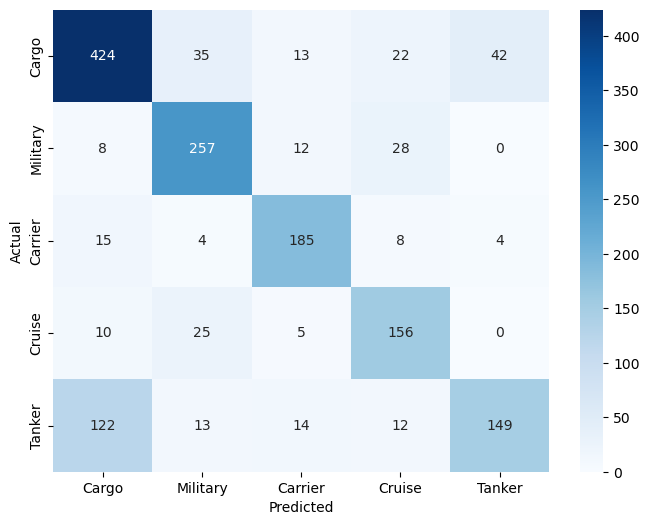

In [51]:
best_cm = confusion_matrix(y_test, best_predicted_classes)
ply.figure(figsize=(8, 6))
sun.heatmap(best_cm, annot=True, fmt='g', cmap='Blues', xticklabels=ship_categories.values(), yticklabels=ship_categories.values())
ply.xlabel('Predicted')
ply.ylabel('Actual')
ply.show()

**Plotting first 20 predictions**

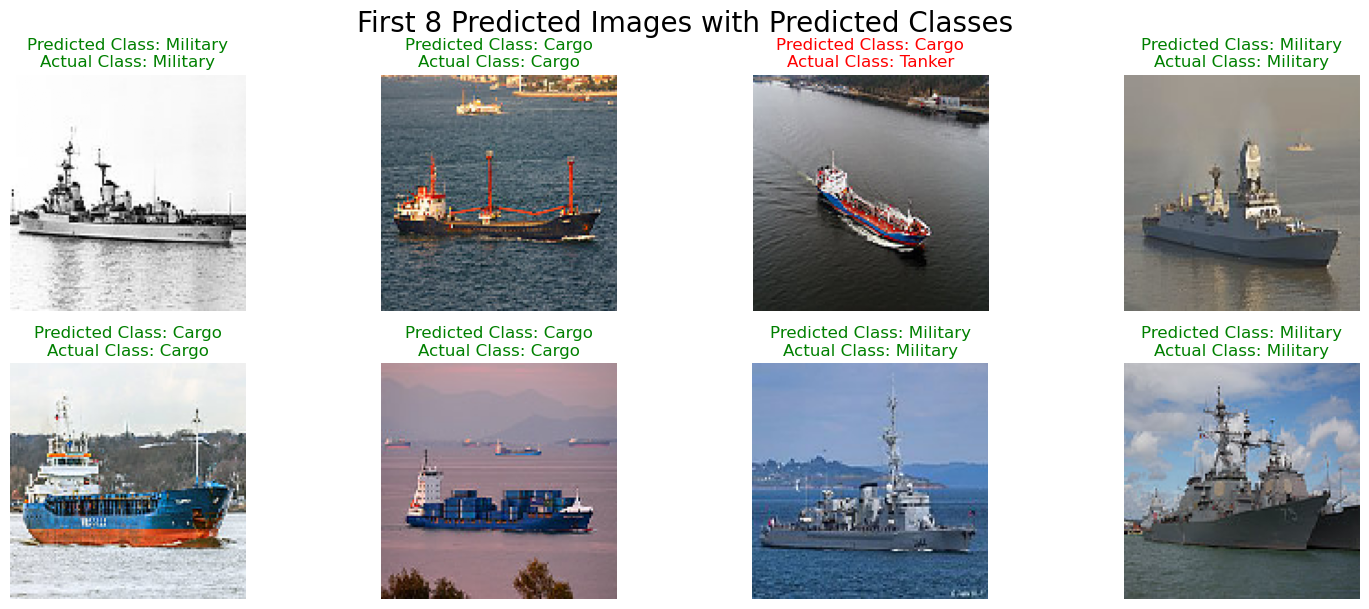

In [53]:
y_test = y_test.reset_index(drop=True)
ply.figure(figsize=(15, 15))
ply.suptitle('First 8 Predicted Images with Predicted Classes', size=20)
for i in range(8):
    ply.subplot(5, 4, i + 1)
    ply.imshow(X_test[i])
    predicted_class_label = ship_categories[best_predicted_classes[i]]
    actual_class_label = ship_categories[y_test[i]]

    if best_predicted_classes[i] == y_test[i]:
        title_color = 'green'
    else:
        title_color = 'red'

    title = f'Predicted Class: {predicted_class_label}\nActual Class: {actual_class_label}'
    ply.title(title, color=title_color)
    ply.axis('off')

ply.tight_layout()
ply.show()

#### **how can we use it as recommendation for any Business**:
- **Performance Monitoring(realtime)**: we do have the implemented dashboard which monitors the project overall performce(realtime).
- **Model Optimization**: Based on confusion matrix analysis, periodically fine-tune the model to improve performance in areas where it underperforms (e.g., military ship detection).

### 4. **Deployment**
The final step involves deploying the trained model to process new ship images in real-time, offering automated classification of ship types.

#### **Actions Taken**:
- **Model Saving and Loading**: The best model based on validation accuracy was saved and loaded for evaluation and prediction.

#### **Why This Step is Important**:
- **Real-time Decision Making**: Once deployed, the model can be used to automatically categorize ships, aiding authorities in making faster, more accurate decisions.
- **Efficiency**: Automating the classification process reduces the time needed for human intervention and minimizes errors.

#### **Recommendations for Business Use**:
- **Automated Alerts**: Set up the system to send alerts to authorities whenever a specific ship type is detected, enabling quick responses to potential issues.
- **Scalability**: Implement the model on a scalable cloud infrastructure to handle increasing numbers of ships as maritime traffic grows.

## Conclusion
By automating ship detection through computer vision and deep learning, the Maritime and Coastguard Agency can streamline its operations, reduce human errors, and improve response times. As the model is refined and deployed, it will enhance maritime safety, security, and environmental monitoring.

### Key Business Recommendations:
- **Cloud-based Deployment**: For scalability and easier updates, consider deploying the model on a cloud platform.
- **Regular Retraining**: Continuously retrain the model with fresh data to maintain high accuracy.
- **Edge Device Integration**: Deploy the model on survey boats or drones for on-site, real-time analysis.

By following these steps and recommendations, the Maritime and Coastguard Agency can build an efficient, automated system that supports their safety, defense, and environmental monitoring initiatives.
